# Practice #1. "Trend analysis"

This notebook is dedicated to:
- Time series smoothing
- Trend estimation and extraction

In [1]:
%pip install numpy pandas matplotlib scikit-learn statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 0. Data reading and visualization

Please, specify path to data

In [11]:
path_to_datafile = "../data/opsd_germany_daily.csv"

In [12]:
# data reading to pandas.DataFrame
df = pd.read_csv(path_to_datafile)

Please, rename time column to `ds` and data column to `y`(you can use `df.rename`) . If use dataset with multiple features select only one and drop NaN values

In [13]:
df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [14]:
# your code here
# df.rename(columns={"...": "ds", "...": "y"}, inplace=True)
df.rename({'Date': 'ds', "Consumption": 'y'}, inplace=True, axis=1)
df = df.dropna(axis=1)

Convert date column to datetime format and set as index

In [15]:
df["ds"] = pd.to_datetime(df["ds"])
df.set_index("ds", inplace=True)

Number of data data points:

In [16]:
df.shape[0]

4383

Print slice of the timeseries:

In [17]:
df.head()

,y
ds,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


Let's plot the data

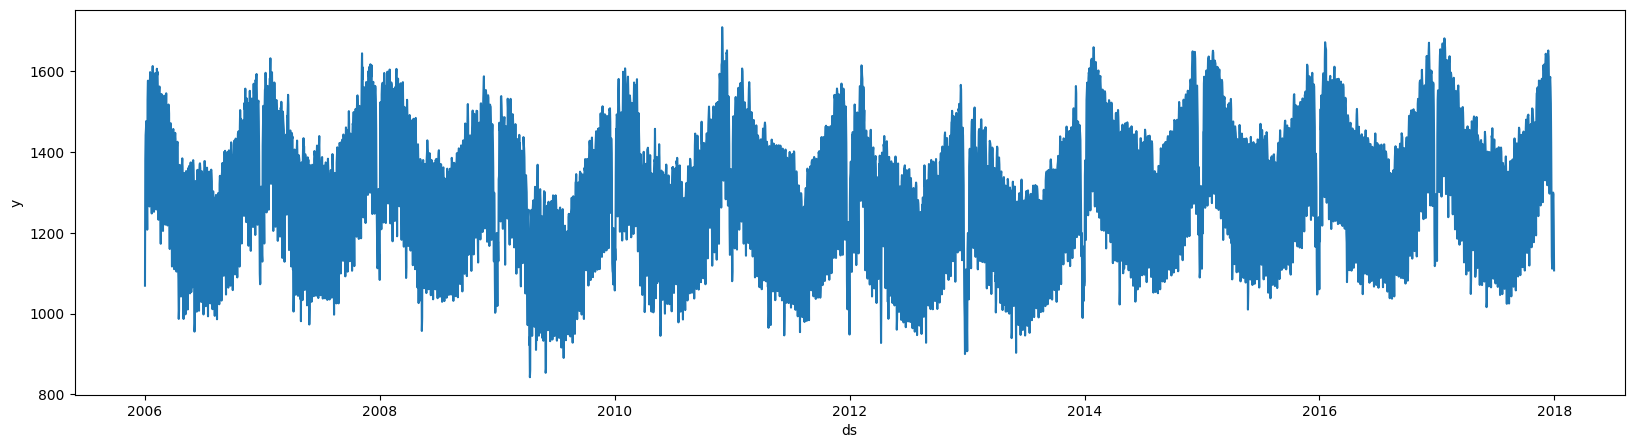

In [18]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
plt.xlabel("ds")
plt.plot(df);

## 1. Timeseries smoothing

### 1.1 Moving average

Pandas provides method `pandas.DataFrame.rolling` for calculating moving average.<br/>There multiple ways to calculate moving average:

#### Centered moving average

$$
    x[t] = \frac{x[t - \lfloor n / 2 \rfloor] + ... + x[t  - 1] + ... + x[t] + x[t + 1] + ... + x[t + \lfloor n / 2 \rfloor]}{n}
$$
where $n$ - window size

Please, calculate centered moving average.

In [22]:
# your code here
# df_centered = ...
df_centered = df.rolling(12, center=True).mean() # let's do moving average over a year
df_centered.head(15)

,y
ds,
2006-01-01,NaN
2006-01-02,NaN
2006-01-03,NaN
2006-01-04,NaN
2006-01-05,NaN
2006-01-06,NaN
2006-01-07,1414.581250
2006-01-08,1454.232750
2006-01-09,1452.518083


#### Trailing moving average

$$
x[t] = \frac{(x[t - n ] + ... + x[t  - 1] + x[t])}{n} 
$$
where $n$ - window size

Please, calculate trailing moving average.

In [24]:
# your code here
# df_trailing = ...
df_trailing = df.rolling(12).mean()
df_trailing.head(15)

,y
ds,
2006-01-01,NaN
2006-01-02,NaN
2006-01-03,NaN
2006-01-04,NaN
2006-01-05,NaN
2006-01-06,NaN
2006-01-07,NaN
2006-01-08,NaN
2006-01-09,NaN


Smoothed data visualization and comparision

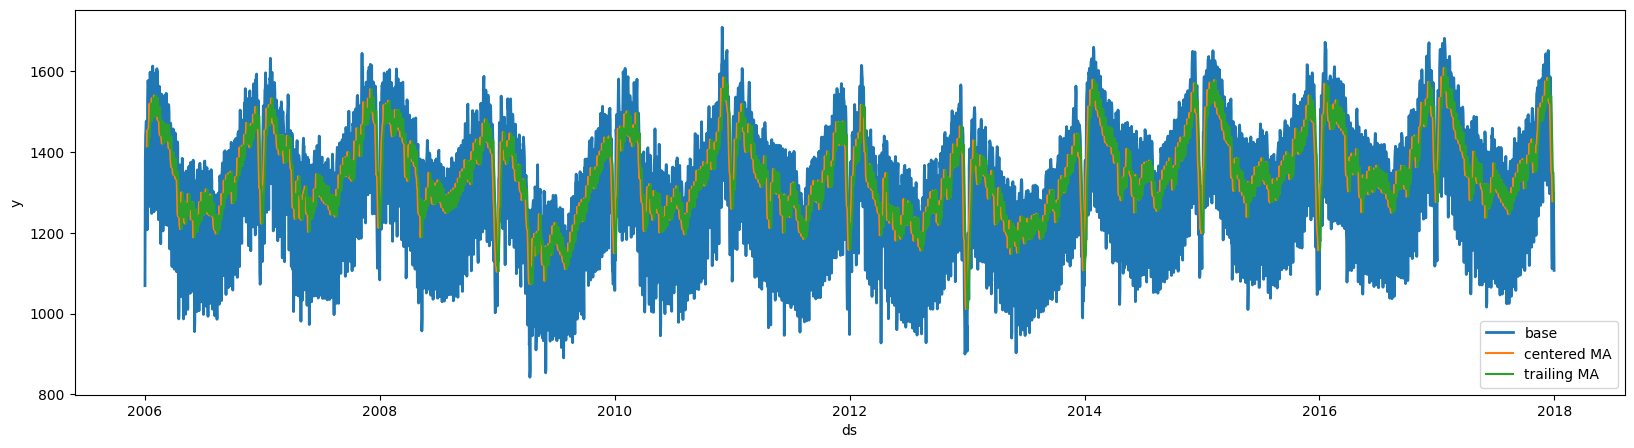

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_centered, label='centered MA')
plt.plot(df_trailing, label='trailing MA')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

Please, smooth the data using different window sizes and compare results

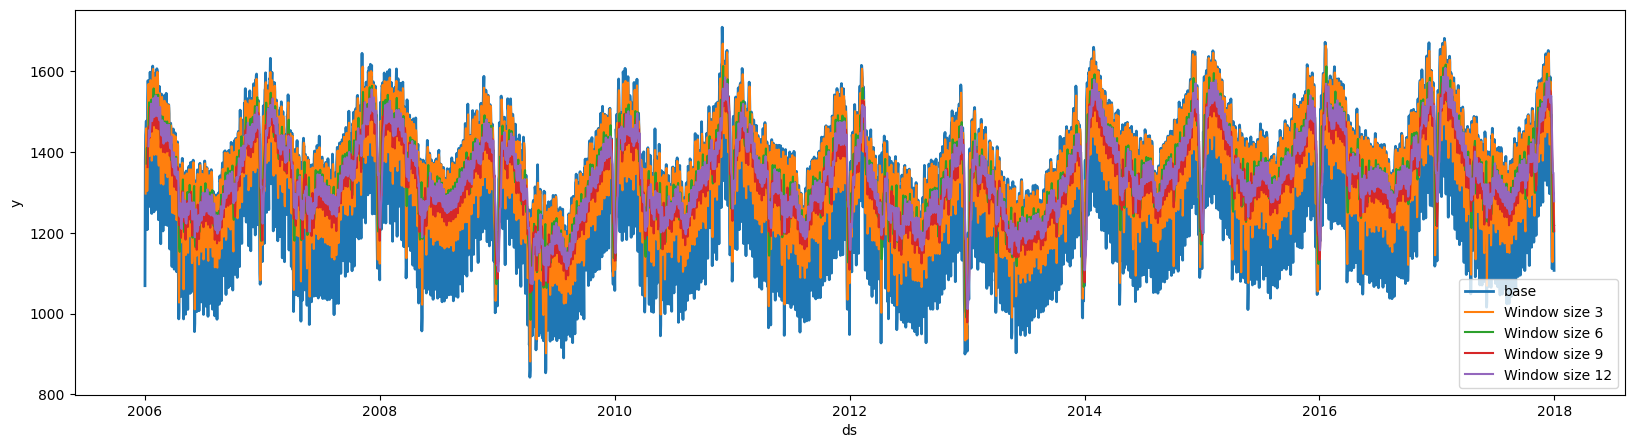

In [26]:
# your code here
df_trailing_3 = df.rolling(3).mean()
df_trailing_6 = df.rolling(6).mean()
df_trailing_9 = df.rolling(9).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_trailing_3, label='Window size 3')
plt.plot(df_trailing_6, label='Window size 6')
plt.plot(df_trailing_9, label='Window size 9')
plt.plot(df_trailing, label='Window size 12')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

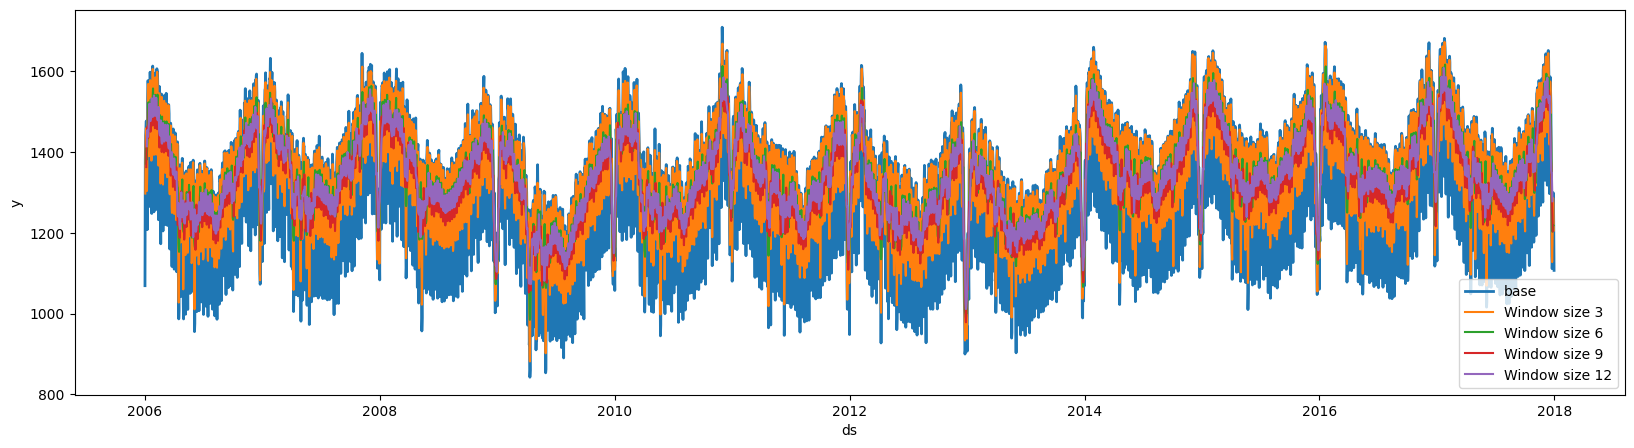

In [27]:
# your code here
df_centered_3 = df.rolling(3, center=True).mean()
df_centered_6 = df.rolling(6, center=True).mean()
df_centered_9 = df.rolling(9, center=True).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_centered_3, label='Window size 3')
plt.plot(df_centered_6, label='Window size 6')
plt.plot(df_centered_9, label='Window size 9')
plt.plot(df_centered, label='Window size 12')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Questions:<br>
- How the window size influence smoothed time-series?
For trailing MA we see that the less the window size, the less "smooth" the graph is. The same can be said about centered MA.

### 1.2 Exponential smoothing

Pandas provides method `pandas.DataFrame.ewm` for exponential smoothing.

Please, calculate exponential smoothing.

In [38]:
# your code here
# df_exp = ...
df_exp = df.ewm(alpha=0.5).mean()
df_exp.head(10)

,y
ds,
2006-01-01,1069.184000
2006-01-02,1276.742000
2006-01-03,1371.479714
2006-01-04,1417.206267
2006-01-05,1448.135161
2006-01-06,1425.426254
2006-01-07,1362.363953
2006-01-08,1284.871773
2006-01-09,1407.336575


Also, statsmodels liblary provides methods for calculation exponential smoothing `statsmodels.tsa.holtwinters.ExponentialSmoothing`.<br>
Please, uase also the statsmodels method with the same alpha.

In [44]:
# your code here
# df_exp_statm = ...
model = ExponentialSmoothing(df['y'], trend=None, seasonal=None)
model = model.fit(smoothing_level=0.5)
df_exp_statm = model.fittedvalues

Results of the both methods shold be identical 

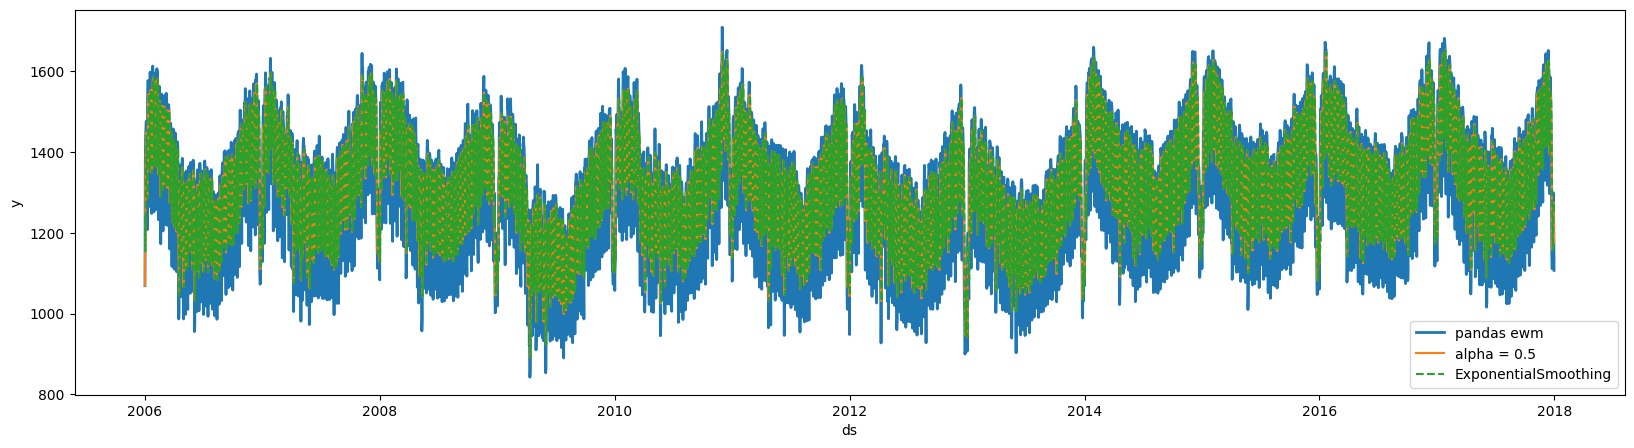

In [45]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='pandas ewm')
plt.plot(df_exp, label='alpha = 0.5')
plt.plot(df_exp_statm, "--", label='ExponentialSmoothing')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

Please, smooth the data using different alpha and compare results

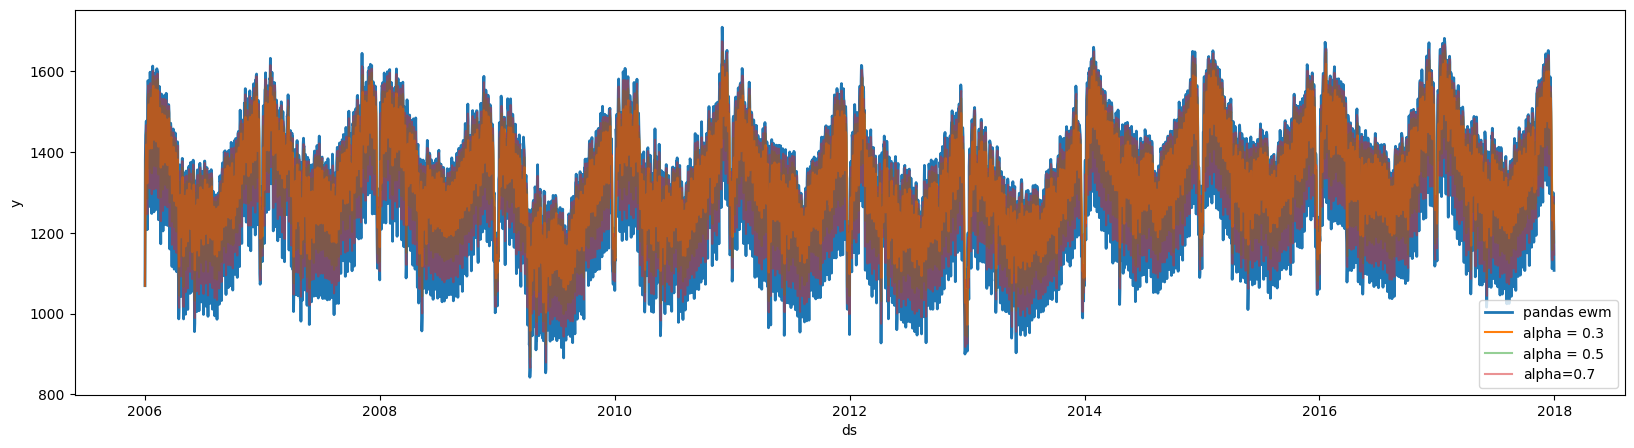

In [43]:
# your code here
df_alpha_03 = df.ewm(alpha=0.3).mean()
df_alpha_07 = df.ewm(alpha=0.7).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='pandas ewm')
plt.plot(df_alpha_03, label='alpha = 0.3')
plt.plot(df_exp, label='alpha = 0.5', alpha=0.5)
plt.plot(df_alpha_07, label='alpha=0.7', alpha=0.5)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

Questions:<br>
- How the alpha coefficient influence smoothed time-series?
    The closer alpha is to 1, the closer it is to original graph, the less smooth it is.

### 1.3 Double exponential smoothing

`statsmodels.tsa.holtwinters.ExponentialSmoothing` alows to calculate double and triple exponential smooothing also.<br>
Please, calculate double exponential smoothing.

In [53]:
# your code here
# df_dexp = ...
model_dexp = ExponentialSmoothing(df, trend='add', seasonal=None)
model_dexp_05 = model_dexp.fit(smoothing_level=0.5)
df_dexp = df.copy()
df_dexp['y'] = model_dexp_05.fittedvalues

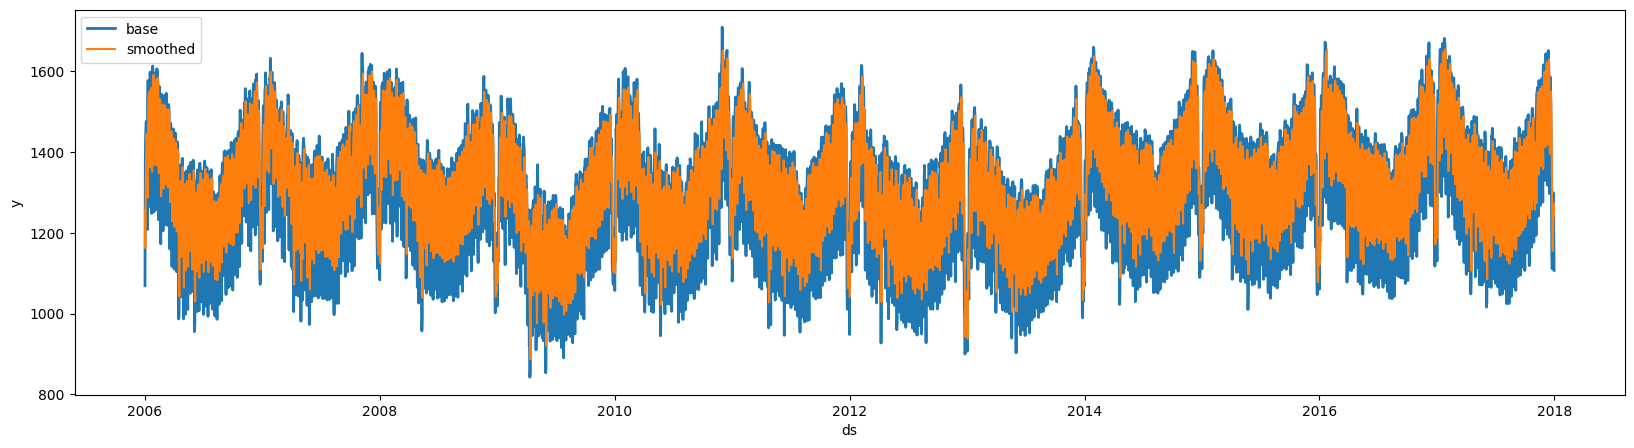

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_dexp, label='smoothed')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

Please, smooth the data using different alpha and beta coefficients and compare results. Also try to use different types of trend("add", "mul").

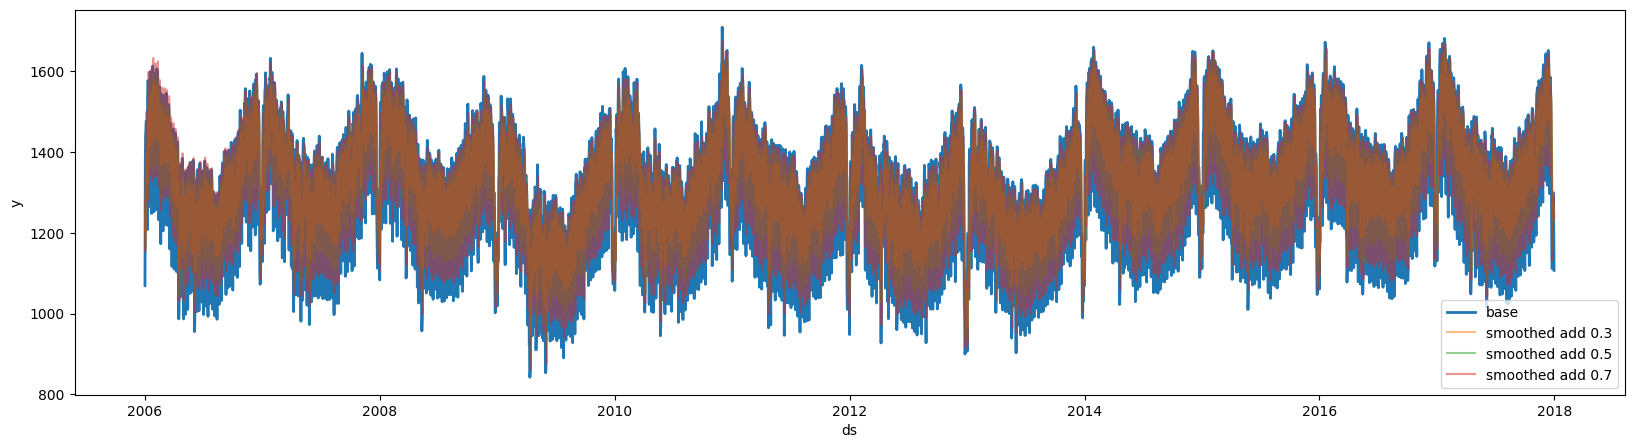

In [57]:
model_dexp_03 = model_dexp.fit(smoothing_level=0.3)
model_dexp_07 = model_dexp.fit(smoothing_level=0.7)

plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_03.fittedvalues, label='smoothed add 0.3', alpha=0.5)
plt.plot(model_dexp_05.fittedvalues, label='smoothed add 0.5', alpha=0.5)
plt.plot(model_dexp_07.fittedvalues, label='smoothed add 0.7', alpha=0.5)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

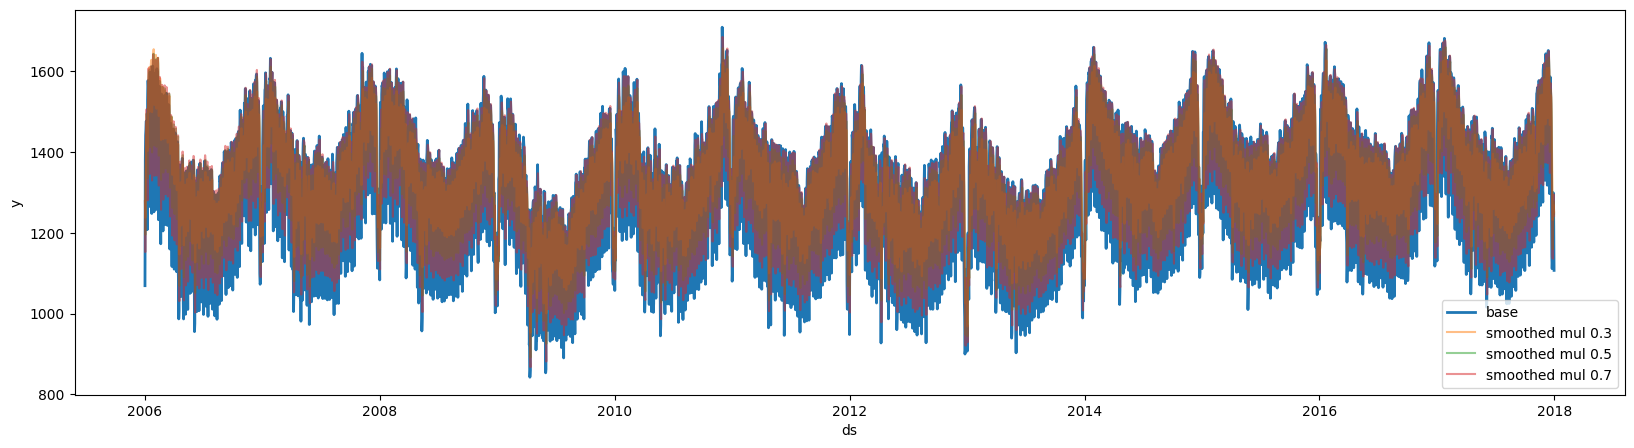

In [51]:
# your code here
model_dexp_mul = ExponentialSmoothing(df, trend='mul', seasonal=None)
model_dexp_mul_03 = model_dexp_mul.fit(smoothing_level=0.3)
model_dexp_mul_05 = model_dexp_mul.fit(smoothing_level=0.5)
model_dexp_mul_07 = model_dexp_mul.fit(smoothing_level=0.7)

plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_mul_03.fittedvalues, label='smoothed mul 0.3', alpha=0.5)
plt.plot(model_dexp_mul_05.fittedvalues, label='smoothed mul 0.5', alpha=0.5)
plt.plot(model_dexp_mul_07.fittedvalues, label='smoothed mul 0.7', alpha=0.5)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

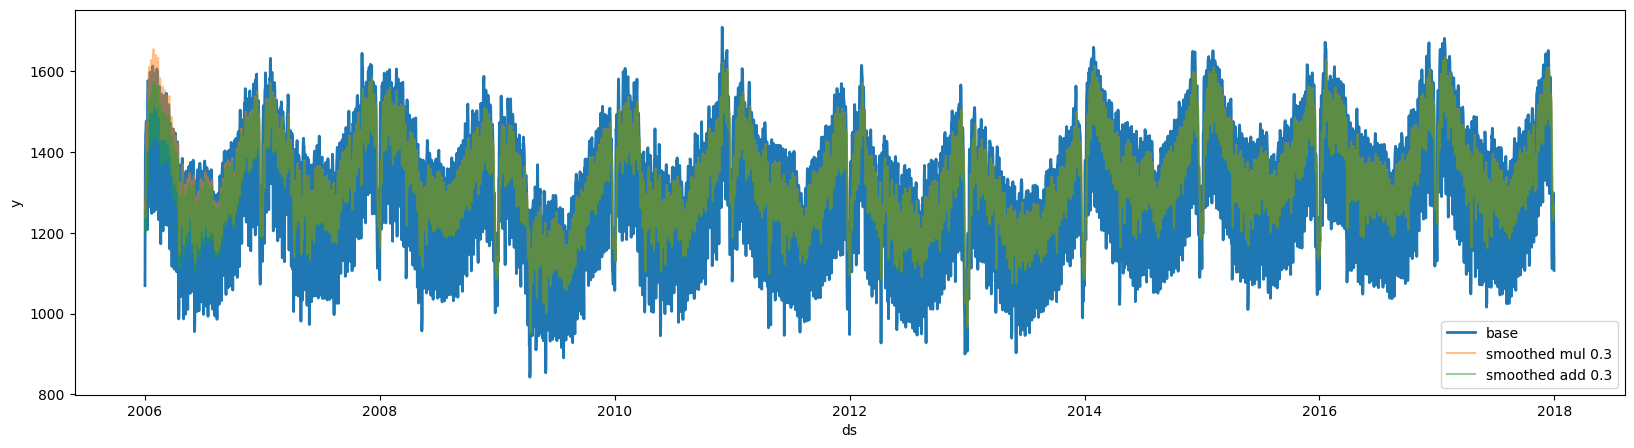

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_mul_03.fittedvalues, label='smoothed mul 0.3', alpha=0.5)
plt.plot(model_dexp_03.fittedvalues, label='smoothed add 0.3', alpha=0.5)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

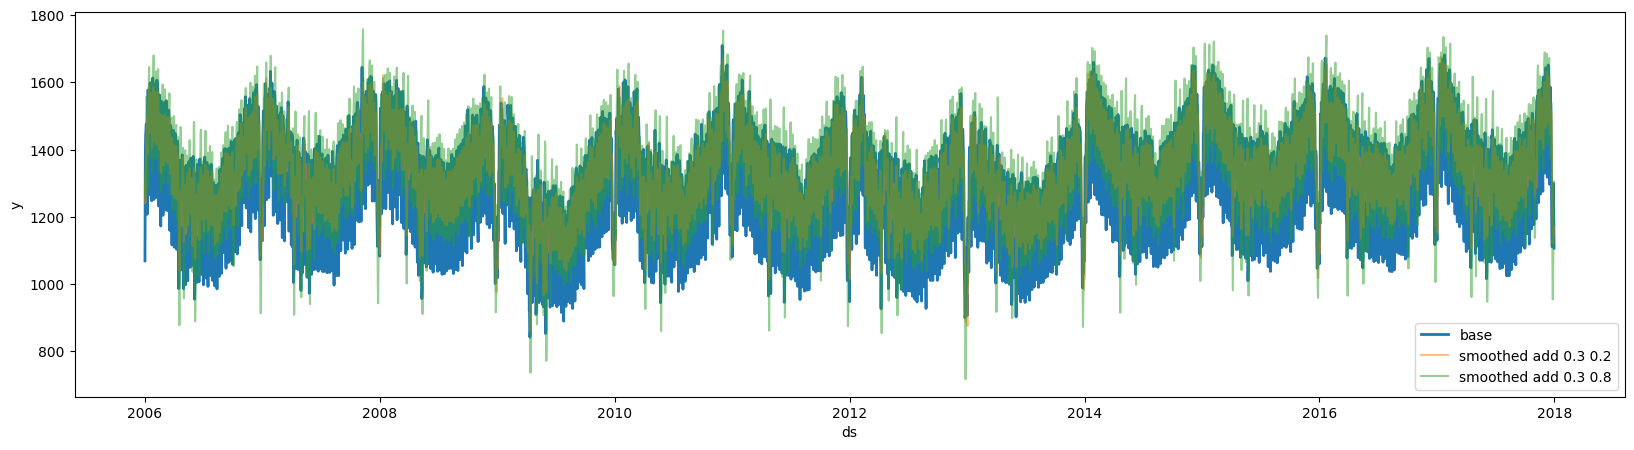

In [64]:
model_dexp_add_03_02 = model_dexp.fit(smoothing_level=0.3, smoothing_trend=0.2) # smoothing slope is beta
model_dexp_add_03_08 = model_dexp.fit(smoothing_level=0.3, smoothing_trend=0.8)
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_add_03_02.fittedvalues, label='smoothed add 0.3 0.2', alpha=0.5)
plt.plot(model_dexp_add_03_08.fittedvalues, label='smoothed add 0.3 0.8', alpha=0.5)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend();

Questions:<br>
- How the beta coefficient influence smoothed time-series?
    We can see that with higher beta we react faster to seasonal changes.
- Is there a relationship between coefficients?
    alpha controls smoothing of overall value (level), whereas beta controls smoothing of the change over time (trend) of value.

## 2. Trend extraction

### 2.1 Linear regression

One of the simplest ways to estimate trend is the Linear Regression model.<br>
Better is to smooth time-series before applying the model using one of the methods above. You can use `sklearn.linear_model.LinearRegression`.

In [121]:
# your code here
# trend = ...
model = LinearRegression()
time_numeric = (df.index - df.index[0]).days.to_numpy().reshape(-1, 1)
model.fit(time_numeric, model_dexp_05.fittedvalues)
trend = model.predict(time_numeric)


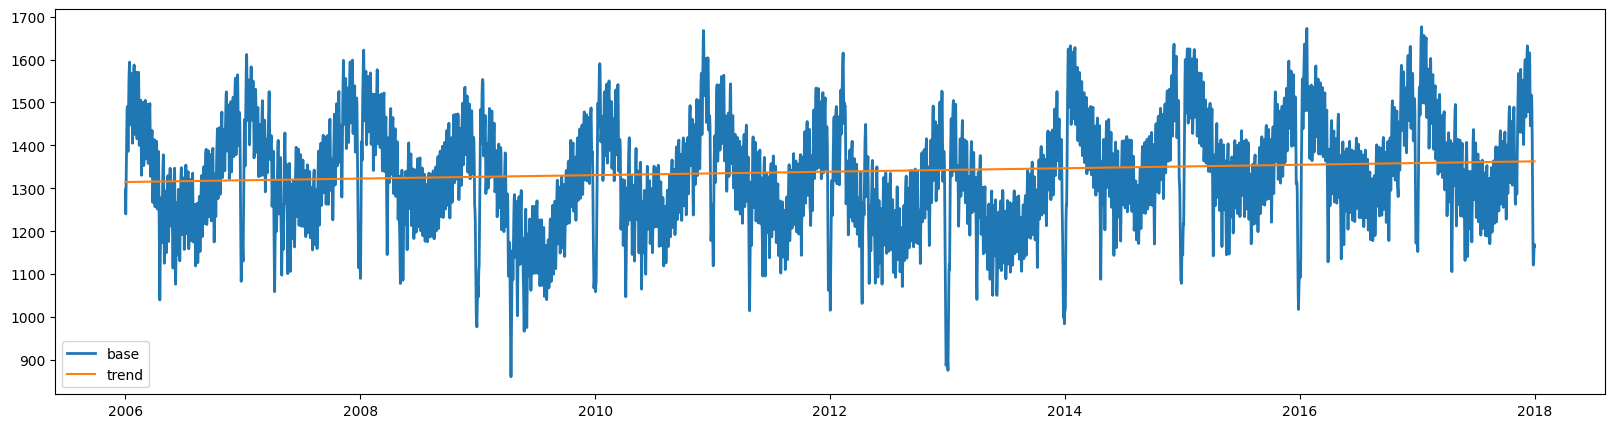

In [122]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, model_dexp_add_03_02.fittedvalues, linewidth=2, label='base')
plt.plot(df.index, trend, label='trend')
plt.legend();

### 2.2 Time series decomposition

Also `statsmodels` liblary provides method for time-series decomposition - `statsmodels.tsa.seasonal.seasonal_decompose`. Please, extrat trend using this method.

In [67]:
# your code here
# trend = ...
trend = seasonal_decompose(df).trend

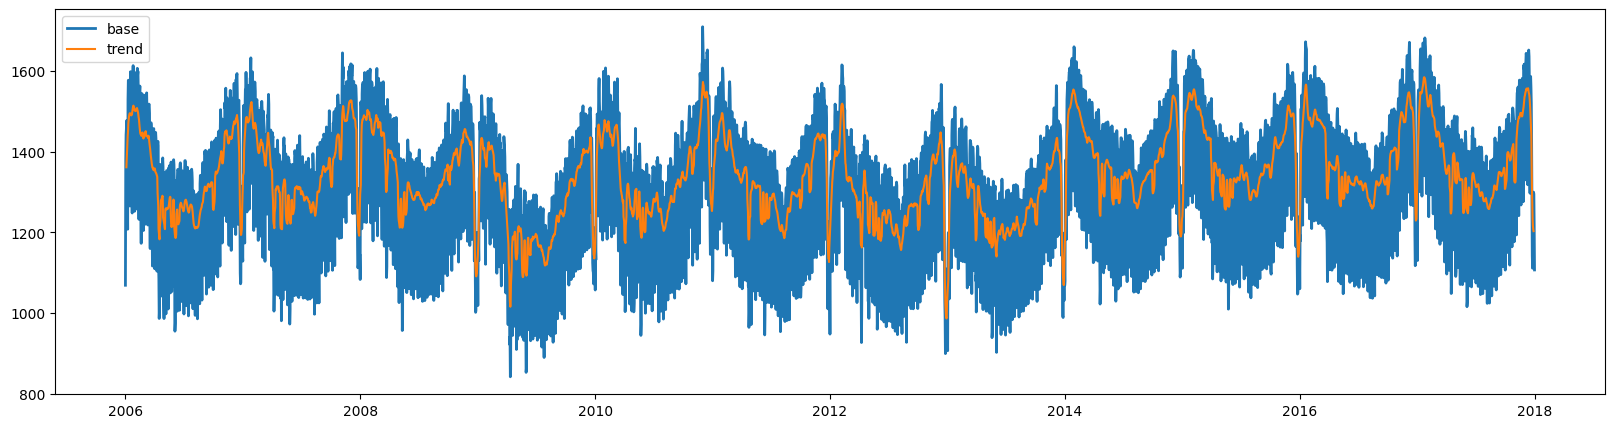

In [68]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(trend, label='trend')
plt.legend();

Please, find difference between trends extracted from smoothed and not smoothed timeseries.

436.61085048742086


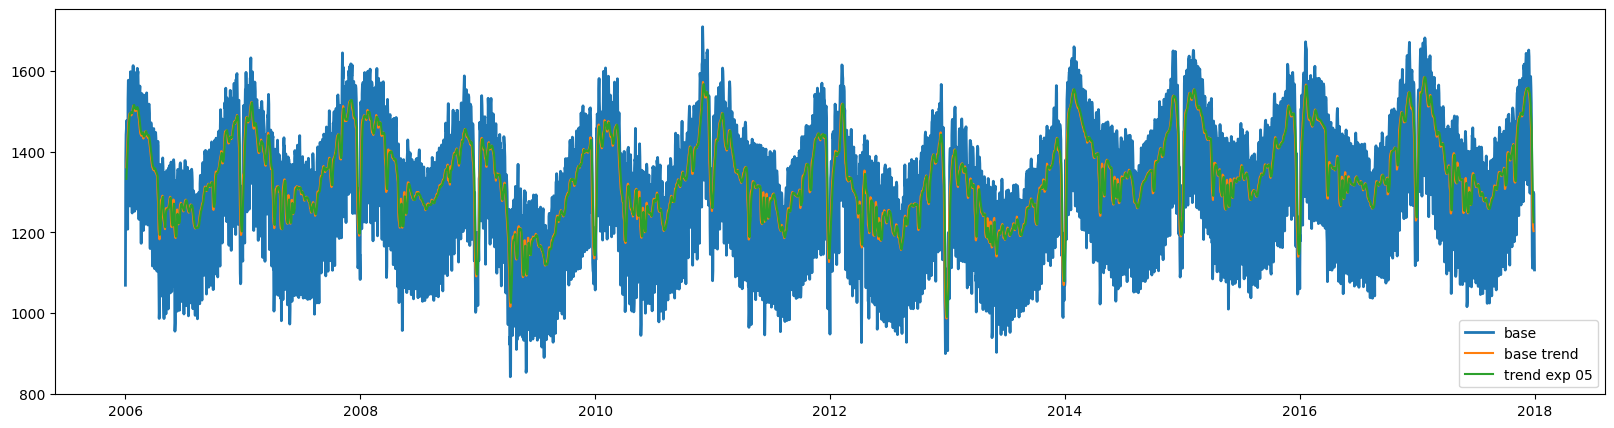

In [75]:
# your code here
# mean_squared_error(...)
trend_exp_05 = seasonal_decompose(model_dexp_05.fittedvalues).trend
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(trend, label='base trend')
plt.plot(trend_exp_05, label='trend exp 05')
plt.legend()

print(mean_squared_error(trend.dropna(), trend_exp_05.dropna()))